# MLBox

Requires training/validation/testing datasets in csv format. The inference too is spilled into csv. 

https://mlbox.readthedocs.io/en/latest/introduction.html


In [ ]:
!pip install mlbox

  Using cached scikit_learn-0.22.1-cp37-cp37m-manylinux1_x86_64.whl (7.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires numpy>=1.18.5, but you have numpy 1.18.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22.1 which is incompatible.


***Restart the runtime before proceeding***

In [ ]:
!pip install imblearn

  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlbox 0.8.5 requires scikit-learn==0.22.1, but you have scikit-learn 1.0.2 which is incompatible.
kapre 0.3.7 requires numpy>=1.18.5, but you have numpy 1.18.2 which is incompatible.


In [ ]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import plot_model

## Setting up dataset

## Superconductors dataset (regression task)

Source: https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data


The dataset contains 81 numerical features of 21263 superconductors. The label corresponds to their critical temperature measured in Kelvin.

In [ ]:
!wget 'https://raw.githubusercontent.com/abcom-mltutorials/automl/main/superconductors.csv'

--2022-02-02 12:59:27--  https://raw.githubusercontent.com/abcom-mltutorials/automl/main/superconductors.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23859780 (23M) [text/plain]
Saving to: ‘superconductors.csv’

superconductors.csv 100%[===================>]  22.75M  --.-KB/s    in 0.06s   

2022-02-02 12:59:27 (356 MB/s) - ‘superconductors.csv’ saved [23859780/23859780]



In [ ]:
regressor_df=pd.read_csv('/content/superconductors.csv')

In [ ]:
regressor_df.shape

(21263, 82)

In [ ]:
features_regressor = regressor_df.iloc[:,:-1]
label_regressor = regressor_df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_regressor, X_test_regressor, label_train_regressor, label_test_regressor = train_test_split(features_regressor, label_regressor, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def error_metrics(y_pred,y_val):
  print('MSE: ',mean_squared_error(y_pred,y_val))
  print('RMSE: ',np.sqrt(mean_squared_error(y_pred,y_val)))
  print('Coefficient of determination: ',r2_score(y_pred,y_val))

## Regressor

In [ ]:
X_train_regressor.shape, label_train_regressor.shape

((17010, 81), (17010,))

In [ ]:
X_train_regressor.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
16546,2,77.143500,53.722300,71.372307,51.848347,0.619298,0.497747,58.55300,32.438300,29.276500,17.565900,730.650000,672.370000,727.009147,671.093559,0.688168,0.365933,145.7,511.670000,72.850000,43.710000,172.500000,175.300000,172.464489,175.287147,0.692941,0.317114,7,141.500000,3.500000,2.100000,8265.000000,5258.600000,7361.226868,4971.644733,0.585882,0.537622,7516.000,2854.000000,3758.000000,...,32.150000,13.710000,22.412497,10.897607,0.407721,0.674062,46.10,2.670000,23.050000,13.830000,17.700000,18.500000,17.671729,18.489667,0.691550,0.303163,2.000,15.160000,1.000000,0.600000,46.500000,26.900000,39.522146,24.734677,0.547081,0.577138,49.00000,12.700000,24.500000,14.700000,4.000000,4.000000,4.000000,4.000000,0.693147,0.325083,0,3.200000,0.000000,0.000000
5970,4,104.365600,71.922350,72.746865,43.369558,1.129463,1.221243,184.59060,26.332050,70.392496,65.568217,891.650000,994.525000,838.584885,923.668549,1.328085,1.012874,810.6,555.950000,301.512840,347.303530,154.250000,126.100000,131.729022,97.477764,1.260175,1.235910,205,46.150000,73.155229,85.620617,6501.357250,3575.614500,883.117278,93.289274,0.977862,1.081982,13532.571,1352.685500,5164.791227,...,69.837500,93.247500,25.084962,50.532590,0.894571,0.665238,141.00,71.100000,62.076781,60.616259,5.903000,4.305000,2.701702,1.266261,0.963720,0.964520,12.878,1.889000,5.037900,4.874169,106.581645,65.343290,6.313081,1.019324,0.270718,0.319780,399.97342,59.986710,169.524558,140.776929,2.000000,2.000000,2.000000,2.000000,1.386294,1.207974,0,0.800000,0.000000,0.000000
7542,5,74.231650,51.256952,60.515221,34.941384,1.453747,1.327852,121.32760,20.724892,39.445875,44.195499,816.360000,1004.612615,771.891022,938.687448,1.552506,0.915890,810.6,701.479692,282.395259,341.879109,160.000000,114.520000,139.595299,89.673653,1.501218,1.375101,205,38.049231,69.922815,79.228649,4816.685800,2941.261769,1074.903488,66.249535,1.322213,0.886765,8958.571,2011.784385,3084.729342,...,62.090000,108.440615,26.186824,84.237345,1.130428,0.759361,141.00,76.721538,57.644743,50.149563,8.014400,5.214923,4.549685,1.332174,1.384657,1.091194,12.878,2.897231,4.438215,5.617195,111.005316,94.675851,13.131173,1.088203,0.785624,0.251330,399.97342,89.831842,150.600199,164.728982,2.200000,2.076923,2.168944,2.063362,1.594167,1.229147,1,1.064615,0.400000,0.266469
2157,7,88.309607,48.586910,69.138309,33.542945,1.740703,1.724444,191.20060,11.938538,57.329551,45.189822,726.442857,1005.6392

In [ ]:
label_train_regressor.name

'critical_temp'

Creat training/testing csv files 

In [ ]:
training1 = pd.concat([X_train_regressor, label_train_regressor], axis=1)
training1.to_csv('training1_file.csv')

testing1 = X_test_regressor
testing1.to_csv('testing1_file.csv')

In [ ]:
type(training1), type(testing1)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

Use Reader to load the files. Specify the target name. 

In [ ]:
paths=['training1_file.csv', 'testing1_file.csv']
rd = Reader(sep = ',')
df = rd.train_test_split(paths, target_name='critical_temp')


reading csv : training1_file.csv ...
cleaning data ...
CPU time: 7.175208568572998 seconds

reading csv : testing1_file.csv ...
cleaning data ...
CPU time: 0.7768888473510742 seconds

> Number of common features : 81

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 0
> Number of numerical features: 81
> Number of training samples : 16969
> Number of test samples : 4253

> You have no missing values on train set...

> Task : regression
count    16969.000000
mean        34.588765
std         34.350772
min          0.000210
25%          5.400000
50%         20.000000
75%         63.100000
max        185.000000
Name: critical_temp, dtype: float64


The function Drift_thresholder drops the biased columns

In [ ]:
dft = Drift_thresholder()
df = dft.fit_transform(df)


computing drifts ...
CPU time: 7.082433700561523 seconds

> Top 10 drifts

('std_ElectronAffinity', 0.02157671710918785)
('wtd_entropy_atomic_mass', 0.020008185395496536)
('range_atomic_radius', 0.019831484244556385)
('number_of_elements', 0.01882200504925624)
('mean_ElectronAffinity', 0.017523093873334172)
('wtd_mean_Valence', 0.017311149698706618)
('wtd_std_atomic_mass', 0.017067134516009386)
('range_fie', 0.016194988933973864)
('mean_Valence', 0.01413587864398913)
('wtd_mean_atomic_mass', 0.014067340141108886)

> Deleted variables : []
> Drift coefficients dumped into directory : save


No columns were dropped. Set the range of values for the various hyper-parameters

In [ ]:
space = {'ne__numerical_strategy':{"space":[0]},
        'fs__strategy':{"search":"choice",
                        "space":['l1','variance','rf_feature_importance']},
        'fs__threshold':{"search":"uniform",
                        "space":[0.01,0.3]},    
        'est__strategy' : {"search":"choice",
                           "space" : ['LightGBM', 'RandomForest', 'ExtraTrees', 'AdaBoost']},
        'est__max_depth':{"search":"choice",
                          "space":[3,4,5,6]},
        'est__n_estimators':{"search":"choice",
                             "space":[250,500,700]}}

Set the number of folds for cross-validation and the scoring, which could be rmse for regression and 'accuracy' for classification. We use the default value for scoring here. 

In [ ]:
opt=Optimiser(n_folds=3)

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


We first evaluate the model on a single run to check if all our parameters are set properly

In [ ]:
opt.evaluate(None, df)

No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


MEAN SCORE : neg_mean_squared_error = -101.07097508536515
VARIANCE : 3.9228381608006457 (fold 1 = -98.49980313353328, fold 2 = -106.61388357071533, fold 3 = -98.09923855184684)
CPU ti

-101.07097508536515

In [ ]:
import time
tic = time.perf_counter()

As the tool worked fine for one evaluation we can now run for 20 number of trials

In [ ]:
best=opt.optimise(space,df,20)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.234943726959232}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 4, 'n_estimators': 250, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
MEAN SCORE : neg_mean_squared_error = -133.54346968437372
VARIANCE : 5.442638378410518 (fold 1 = -133.21632744038556, fold 2 = -140.3668607920258, fold 3 = -127.047220820709

/usr/local/lib/python3.7/dist-packages/mlbox/model/regression/regressor.py:82: UserWarning: Invalid parameter for regressor AdaBoost. Parameter IGNORED. Check the list of available parameters with `regressor.get_params().keys()`
  + ". Parameter IGNORED. Check the list of "



MEAN SCORE : neg_mean_squared_error = -322.76086070362084
VARIANCE : 0.5512347959429762 (fold 1 = -322.5527391312631, fold 2 = -322.21430350762665, fold 3 = -323.5155394719728)
CPU time: 123.29912328720093 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.1232382042455423}
>>> ESTIMATOR :{'strategy': 'ExtraTrees', 'max_depth': 5, 'n_estimators': 250, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
MEAN SCORE : neg_mean

/usr/local/lib/python3.7/dist-packages/mlbox/model/regression/regressor.py:82: UserWarning: Invalid parameter for regressor AdaBoost. Parameter IGNORED. Check the list of available parameters with `regressor.get_params().keys()`
  + ". Parameter IGNORED. Check the list of "



MEAN SCORE : neg_mean_squared_error = -333.37516968959153
VARIANCE : 7.583089069528471 (fold 1 = -325.67014595793376, fold 2 = -343.6875048289741, fold 3 = -330.76785828186667)
CPU time: 220.29305744171143 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.21349156765022198}
>>> ESTIMATOR :{'strategy': 'ExtraTrees', 'max_depth': 6, 'n_estimators': 500, 'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
MEAN SCORE : neg_mea

/usr/local/lib/python3.7/dist-packages/mlbox/model/regression/regressor.py:82: UserWarning: Invalid parameter for regressor AdaBoost. Parameter IGNORED. Check the list of available parameters with `regressor.get_params().keys()`
  + ". Parameter IGNORED. Check the list of "



MEAN SCORE : neg_mean_squared_error = -339.934081498018
VARIANCE : 12.799822153166705 (fold 1 = -337.6038039069579, fold 2 = -356.6452977888681, fold 3 = -325.5531427982279)
CPU time: 131.39312148094177 seconds
100%|██████████| 20/20 [18:03<00:00, 54.17s/trial, best loss: 105.4958057399657]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ BEST HYPER-PARAMETERS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

{'est__max_depth': 5, 'est__n_estimators': 700, 'est__strategy': 'LightGBM', 'fs__strategy': 'l1', 'fs__threshold': 0.290701184999186, 'ne__numerical_strategy': 0}


The ESTIMATOR line above gives the best model with fine-tuned hyper-parameters. 


In [ ]:
toc = time.perf_counter()
print (f"Elapsed time {toc - tic:0.4f} seconds")

Elapsed time 1083.4102 seconds


Inference


fitting the pipeline ...
CPU time: 5.531095027923584 seconds


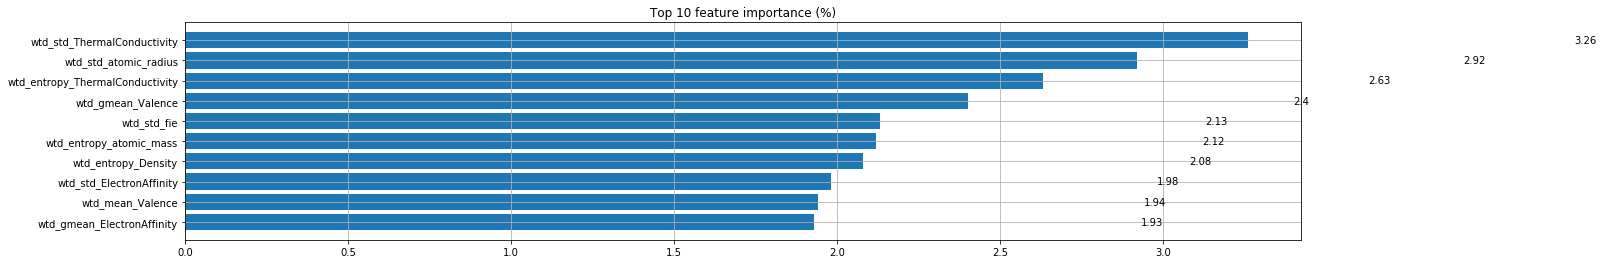


> Feature importances dumped into directory : save

predicting...
CPU time: 0.12866640090942383 seconds

> Overview on predictions : 

   critical_temp_predicted
0                 9.461727
1                86.028325
2                33.135221
3                22.276576
4                 6.609473
5                59.639491
6                80.178437
7                57.142375
8                33.789676
9                17.965072

dumping predictions into directory : save ...


In [ ]:
prd = Predictor()
prd.fit_predict(best, df)

The predictions are stored in csv file

In [ ]:
class_predicted_mlbox=pd.read_csv('/content/save/critical_temp_predictions.csv')

In [ ]:
class_predicted_mlbox['critical_temp_predicted'] 

0        9.461727
1       86.028325
2       33.135221
3       22.276576
4        6.609473
          ...    
4248    80.874320
4249    73.704579
4250     3.876450
4251    10.328666
4252     5.448358
Name: critical_temp_predicted, Length: 4253, dtype: float64

In [ ]:
X_train_regressor.shape, X_test_regressor.shape, label_train_regressor.shape, label_test_regressor.shape

((17010, 81), (4253, 81), (17010,), (4253,))

In [ ]:
label_test_regressor.shape, class_predicted_mlbox['critical_temp_predicted'].shape

((4253,), (4253,))

Compute the error metrics

In [ ]:
error_metrics(label_test_regressor, class_predicted_mlbox['critical_temp_predicted'])

MSE:  87.77266825021174
RMSE:  9.36870686115281
Coefficient of determination:  0.9237475817171334


## Biodegradation dataset (classification task)

Source: https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation


The dataset contains 21 numerical features (molecular attributes) of 1055 chemicals. The label corresponds to their experimental class (ready biodegradable "RB" or not ready biodegradable "NRB")

In [ ]:
!wget 'https://raw.githubusercontent.com/abcom-mltutorials/automl/main/biodeg.csv'

--2022-02-02 13:18:33--  https://raw.githubusercontent.com/abcom-mltutorials/automl/main/biodeg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155987 (152K) [text/plain]
Saving to: ‘biodeg.csv’

biodeg.csv          100%[===================>] 152.33K  --.-KB/s    in 0.002s  

2022-02-02 13:18:33 (64.6 MB/s) - ‘biodeg.csv’ saved [155987/155987]



In [ ]:
classifier_df=pd.read_csv('/content/biodeg.csv', delimiter=';', header=None)

In [ ]:
classifier_df.shape

(1055, 42)

In [ ]:
classifier_df.rename(columns={41:'label'}, inplace=True)

In [ ]:
classifier_df.columns = classifier_df.columns.astype(str)

In [ ]:
features_classifier = classifier_df.iloc[:,:-1]
label_classifier = classifier_df.iloc[:,-1]

The following couple of cells are to balance the label: 

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_classifier, y_classifier = sm.fit_resample(features_classifier, label_classifier)

In [ ]:
y_classifier.value_counts()

RB     699
NRB    699
Name: label, dtype: int64

In [ ]:
y_classifier = y_classifier.replace('NRB',0).replace('RB',1)

In [ ]:
X_train_classifier, X_test_classifier, label_train_classifier, label_test_classifier = train_test_split(X_classifier, y_classifier, random_state=42, test_size = 0.2)

## Classifier

In [ ]:
X_train_classifier.shape, X_train_classifier.shape

((1118, 41), (1118, 41))

In [ ]:
X_train_classifier.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
48,4.644000,3.907100,0,0,0,0,0,31.600000,2,3,0,-0.104,3.08200,1.837000,9.467000,5,1.021000,1.142000,0,0,0,1.149000,0,0,0,0,2.084000,0.049000,0,10.469,2.732000,0,0,0,1,3.525000,3.093000,0,7.886000,0,0
155,5.156000,2.452400,0,0,0,0,4,55.600000,0,6,0,-3.296,3.78800,0.750000,10.813000,16,1.103000,1.093000,0,0,0,1.225000,6,0,0,0,2.532000,0.000000,0,44.736,1.508000,0,0,0,0,3.986000,3.271000,0,9.007000,4,0
756,4.414000,4.388300,0,1,0,0,0,9.100000,0,2,0,-0.662,2.94600,1.379000,9.222000,2,1.097000,1.219000,0,0,0,1.074000,0,0,0,0,2.000000,0.171000,0,18.567,2.133000,0,0,1,4,3.689000,4.167000,4,8.139000,0,0
1070,4.503037,3.037476,0,0,0,0,1,43.418742,0,1,0,0.000,3.01153,1.188692,9.328942,2,0.990103,1.117673,0,0,0,1.252776,1,0,0,0,2.138916,0.029301,0,0.000,1.605469,0,1,0,0,3.573224,2.129853,0,7.889213,0,0
303,5.029000,1.686400,2,0,7,0,2,38.800000,0,0,6,0.000,4.12800,0.000000,10.839000,0,0.979000,1.119000,0,0,0,1.308000,5,0,0,0,2.418000,0.000000,0,0.000,3.219000,0,0,7,0,4.348000,1.710000,2,9.423000,0,0


In [ ]:
label_train_classifier.name

'label'

In [ ]:
training2 = pd.concat([X_train_classifier, label_train_classifier], axis=1)
testing2 = X_test_classifier

In [ ]:
type(training2), type(testing2)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

Create training/testing csv files

In [ ]:
training2.to_csv('training2_file.csv')
testing2.to_csv('testing2_file.csv')

Use Reader to load files

In [ ]:
paths=['training2_file.csv', 'testing2_file.csv']
rd = Reader(sep = ',')
df2 = rd.train_test_split(paths, target_name='label')


reading csv : training2_file.csv ...
cleaning data ...
CPU time: 0.1522533893585205 seconds

reading csv : testing2_file.csv ...
cleaning data ...
CPU time: 0.13157343864440918 seconds

> Number of common features : 41

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 0
> Number of numerical features: 41
> Number of training samples : 1116
> Number of test samples : 280

> You have no missing values on train set...

> Task : classification
1.0    561
0.0    555
Name: label, dtype: int64

encoding target ...


Drop the biased columns

In [ ]:
dft = Drift_thresholder()
df2 = dft.fit_transform(df2)


computing drifts ...
CPU time: 0.6580839157104492 seconds

> Top 10 drifts

('7', 0.06742191500256034)
('37', 0.06036226318484372)
('30', 0.04993599590373776)
('4', 0.04954557091653866)
('32', 0.048105478750640085)
('8', 0.046505376344085914)
('26', 0.04584613415258598)
('40', 0.04480926779313865)
('10', 0.043958013312852096)
('14', 0.04242191500256021)

> Deleted variables : []
> Drift coefficients dumped into directory : save


No columns are dropped. Set the range of values for various hyper-parameters

In [ ]:
space = {'ne__numerical_strategy':{"space":[0]},
        'fs__strategy':{"search":"choice",
                        "space":['l1','variance','rf_feature_importance']},
        'fs__threshold':{"search":"uniform",
                        "space":[0.01,0.3]},
        'est__strategy' : {"search":"choice",
                           "space" : ['LightGBM', 'RandomForest', 'ExtraTrees', 'AdaBoost']},    
        'est__max_depth':{"search":"choice",
                          "space":[3,4,5,6]},
        'est__n_estimators':{"search":"choice",
                             "space":[250,500,700]}}

Create optimizer

In [ ]:
opt=Optimiser(scoring="accuracy", n_folds=3)

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


Evaluate optimizer on a single trial

In [ ]:
opt.evaluate(None, df2)

No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


MEAN SCORE : accuracy = 0.8853046594982078
VARIANCE : 0.010827102126876847 (fold 1 = 0.9005376344086021, fold 2 = 0.8763440860215054, fold 3 = 0.8790322580645161)
CPU time: 2.29472661

0.8853046594982078

Run optimizer for 20 trials

In [ ]:
import time
tic = time.perf_counter()

In [ ]:
best=opt.optimise(space,df2,20)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.06878971424932297}
>>> ESTIMATOR :{'strategy': 'AdaBoost', 'n_estimators': 250, 'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.05, 'random_state': 0}
  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.7/dist-packages/mlbox/model/classification/classifier.py:92: UserWarning: Invalid parameter for classifier AdaBoost. Parameter IGNORED. Check the list of available parameters with `classifier.get_params().keys()`
  + ". Parameter IGNORED. Check the list of "



MEAN SCORE : accuracy = 0.8629032258064516
VARIANCE : 0.019008246806089972 (fold 1 = 0.8763440860215054, fold 2 = 0.8763440860215054, fold 3 = 0.8360215053763441)
CPU time: 2.088958501815796 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.23017272079683318}
>>> ESTIMATOR :{'strategy': 'AdaBoost', 'n_estimators': 250, 'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.05, 'random_state': 0}
  5%|▌         | 1/20 [00:02<00:39,  2.10s/trial, best loss: -0.8629032258064516]

/usr/local/lib/python3.7/dist-packages/mlbox/model/classification/classifier.py:92: UserWarning: Invalid parameter for classifier AdaBoost. Parameter IGNORED. Check the list of available parameters with `classifier.get_params().keys()`
  + ". Parameter IGNORED. Check the list of "



MEAN SCORE : accuracy = 0.8611111111111112
VARIANCE : 0.014280804167122952 (fold 1 = 0.8602150537634409, fold 2 = 0.8790322580645161, fold 3 = 0.8440860215053764)
CPU time: 2.8643689155578613 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.13105671802566984}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 4, 'n_estimators': 700, 'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
MEAN SCORE : accuracy = 0.861111

/usr/local/lib/python3.7/dist-packages/mlbox/model/classification/classifier.py:92: UserWarning: Invalid parameter for classifier AdaBoost. Parameter IGNORED. Check the list of available parameters with `classifier.get_params().keys()`
  + ". Parameter IGNORED. Check the list of "



MEAN SCORE : accuracy = 0.8611111111111112
VARIANCE : 0.014280804167122952 (fold 1 = 0.8602150537634409, fold 2 = 0.8790322580645161, fold 3 = 0.8440860215053764)
CPU time: 2.8967745304107666 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.06425825850380303}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 700, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_f

/usr/local/lib/python3.7/dist-packages/mlbox/model/classification/classifier.py:92: UserWarning: Invalid parameter for classifier AdaBoost. Parameter IGNORED. Check the list of available parameters with `classifier.get_params().keys()`
  + ". Parameter IGNORED. Check the list of "



MEAN SCORE : accuracy = 0.8790322580645161
VARIANCE : 0.005807115321153991 (fold 1 = 0.8817204301075269, fold 2 = 0.8844086021505376, fold 3 = 0.8709677419354839)
CPU time: 6.223439931869507 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.18901776252787036}
>>> ESTIMATOR :{'strategy': 'ExtraTrees', 'max_depth': 5, 'n_estimators': 250, 'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
MEAN SCORE : accuracy = 0.840501792114695

/usr/local/lib/python3.7/dist-packages/mlbox/model/classification/classifier.py:92: UserWarning: Invalid parameter for classifier AdaBoost. Parameter IGNORED. Check the list of available parameters with `classifier.get_params().keys()`
  + ". Parameter IGNORED. Check the list of "



MEAN SCORE : accuracy = 0.8611111111111112
VARIANCE : 0.014280804167122952 (fold 1 = 0.8602150537634409, fold 2 = 0.8790322580645161, fold 3 = 0.8440860215053764)
CPU time: 2.9158947467803955 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.18922143044353415}
>>> ESTIMATOR :{'strategy': 'ExtraTrees', 'max_depth': 6, 'n_estimators': 700, 'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
MEAN SCORE : accuracy = 0.85752688172043

/usr/local/lib/python3.7/dist-packages/mlbox/model/classification/classifier.py:92: UserWarning: Invalid parameter for classifier AdaBoost. Parameter IGNORED. Check the list of available parameters with `classifier.get_params().keys()`
  + ". Parameter IGNORED. Check the list of "



MEAN SCORE : accuracy = 0.8790322580645161
VARIANCE : 0.005807115321153991 (fold 1 = 0.8817204301075269, fold 2 = 0.8844086021505376, fold 3 = 0.8709677419354839)
CPU time: 6.2288432121276855 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.23250542555732184}
>>> ESTIMATOR :{'strategy': 'AdaBoost', 'n_estimators': 250, 'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.05, 'random_state': 0}
 70%|███████   | 14/20 [00:44<00:25,  4.32s/trial, best loss: -0.8870967741935484]

/usr/local/lib/python3.7/dist-packages/mlbox/model/classification/classifier.py:92: UserWarning: Invalid parameter for classifier AdaBoost. Parameter IGNORED. Check the list of available parameters with `classifier.get_params().keys()`
  + ". Parameter IGNORED. Check the list of "



MEAN SCORE : accuracy = 0.8602150537634409
VARIANCE : 0.02291525421602941 (fold 1 = 0.8736559139784946, fold 2 = 0.8790322580645161, fold 3 = 0.8279569892473119)
CPU time: 1.9491219520568848 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.24512410988227634}
>>> ESTIMATOR :{'strategy': 'AdaBoost', 'n_estimators': 700, 'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.05, 'random_state': 0}
 75%|███████▌  | 15/20 [00:46<00:18,  3.61s/trial, best loss: -0.8870967741935484]

/usr/local/lib/python3.7/dist-packages/mlbox/model/classification/classifier.py:92: UserWarning: Invalid parameter for classifier AdaBoost. Parameter IGNORED. Check the list of available parameters with `classifier.get_params().keys()`
  + ". Parameter IGNORED. Check the list of "



MEAN SCORE : accuracy = 0.8754480286738352
VARIANCE : 0.01866726402867351 (fold 1 = 0.8844086021505376, fold 2 = 0.8924731182795699, fold 3 = 0.8494623655913979)
CPU time: 5.470525741577148 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.19995432442661312}
>>> ESTIMATOR :{'strategy': 'RandomForest', 'max_depth': 5, 'n_estimators': 500, 'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
MEAN SCORE : accuracy

In [ ]:
toc = time.perf_counter()
print (f"Elapsed time {toc - tic:0.4f} seconds")

Elapsed time 62.4687 seconds


ESTIMATOR gives the best model with fine-tuned hyper-parameters


fitting the pipeline ...
CPU time: 0.6199147701263428 seconds


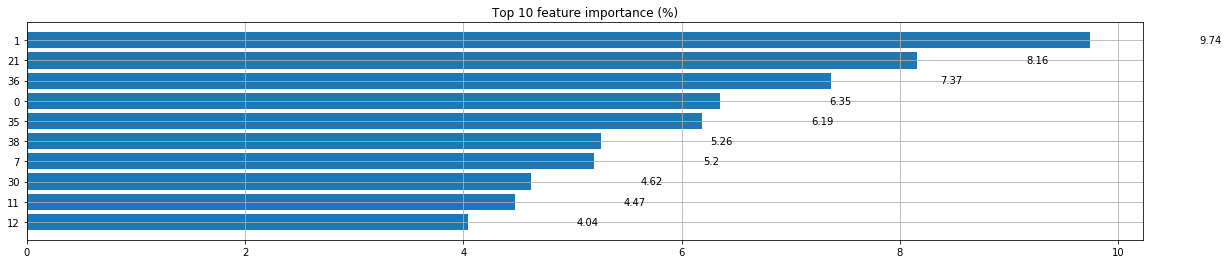


> Feature importances dumped into directory : save

predicting ...
CPU time: 0.037960052490234375 seconds

> Overview on predictions : 

        0.0       1.0  label_predicted
0  0.998554  0.001446                0
1  0.456869  0.543131                1
2  0.995760  0.004240                0
3  0.375087  0.624913                1
4  0.000260  0.999740                1
5  0.702108  0.297892                0
6  0.006592  0.993408                1
7  0.999997  0.000003                0
8  0.996638  0.003362                0
9  0.000781  0.999219                1

dumping predictions into directory : save ...


In [ ]:
prd = Predictor()
prd.fit_predict(best, df2)

Predictions are stored in csv file

In [ ]:
reg_predicted_mlbox=pd.read_csv('/content/save/label_predictions.csv')

In [ ]:
reg_predicted_mlbox['label_predicted'] 

0      0
1      1
2      0
3      1
4      1
      ..
275    0
276    0
277    0
278    1
279    1
Name: label_predicted, Length: 280, dtype: int64

In [ ]:
label_test_classifier.shape, reg_predicted_mlbox['label_predicted'].shape

((280,), (280,))

Compute the classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(reg_predicted_mlbox['label_predicted'], label_test_classifier))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       138
           1       0.93      0.90      0.92       142

    accuracy                           0.92       280
   macro avg       0.92      0.92      0.92       280
weighted avg       0.92      0.92      0.92       280

